# Experiment Runner Example

In [94]:
from ExperimentRunner.ExperimentRunner import *

In [95]:
import numpy as np
import pandas as pd
from ipyparallel import require
import time

## Test function
* simple function to do some stupid calculation
* ipyparallel.require needs to be used to include required packages and python objects
* measure time to see wether the calculation speed is similar in parallel/sequential computation
* Originially this was some more complex numpy calculation (svd of a large matrix) however this was parallized by numpy very well (and you just cant compete with that \o/)

In [96]:
@require('numpy as np', 'pandas as pd', 'time')
def example_function(seed=0, x=1, y=1):
    s = 0
    t = time.time()
    for i in range(x):
        for j in range(y):
            s += i + j
    t = time.time() - t
    return pd.DataFrame([{"seed": seed, "value": s, "time": t}])

## Experiment Setup

* Define a set of parameters for the experiment
* For each parameter the values in `space` are used while the other parameters are at the default value
* The experiment itself is also set up and the tasks are generated

In [97]:
parameters = [
    Parameter(name="x", default=100, space=range(100000,100010)),
    Parameter(name="y", default=100, space=range(100000,100010))
]
experiment = Experiment(runs=3, seed=1, function=example_function, parameters=parameters)
experiment.generate_tasks()

## Run the Expiremnt
* first parallel then sequential, measuring walltime
* cpu-time is not really saying much, as it does not measure the cpu-time of the cluster
* with the right amount of engines there is some speedup

In [98]:
%%time
df = experiment.run_map(parallel=True).copy()
df["parallel"] = True

  63/63 tasks finished after   29 s
done
CPU times: user 478 ms, sys: 211 ms, total: 689 ms
Wall time: 29.4 s


In [99]:
%%time
df2 = experiment.run_map(parallel=False)
df2["parallel"] = False

CPU times: user 48.5 s, sys: 404 ms, total: 48.9 s
Wall time: 49.1 s


In [100]:
experiment.results.head(6)

,seed,time,value,x,y,parallel
0,1791095845,0.000987,990000,100,100,False
0,4282876139,0.001095,990000,100,100,False
0,3093770124,0.000838,990000,100,100,False
0,4005303368,0.783282,500490000000,100000,100,False
0,491263,0.778435,500490000000,100000,100,False
0,550290313,0.761102,500490000000,100000,100,False


In [101]:
t.median()

1.1424446105957031

In [102]:
df_g = pd.concat([df, df2])

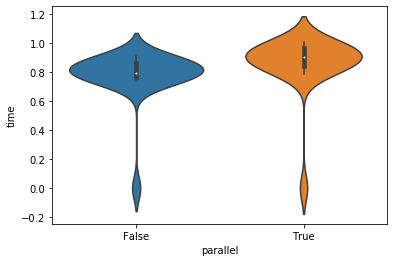

In [103]:
import seaborn as sns
sns.violinplot(data=df_g, y="time", x="parallel")

## Results

* If the right number of enignes is used (2 for my computer) there is considerable speedup of the overal experimet duration
* When too many engines are running the time needed for the computation rises and cancels parallelization-benefits